In [13]:
# Реализуйте высокочастотную фильтрацию на основе ядра Гаусса
# Реализуйте удаление периодического шума

In [14]:
import numpy as np
import cv2
from skimage.feature import peak_local_max
from matplotlib import pyplot as plt

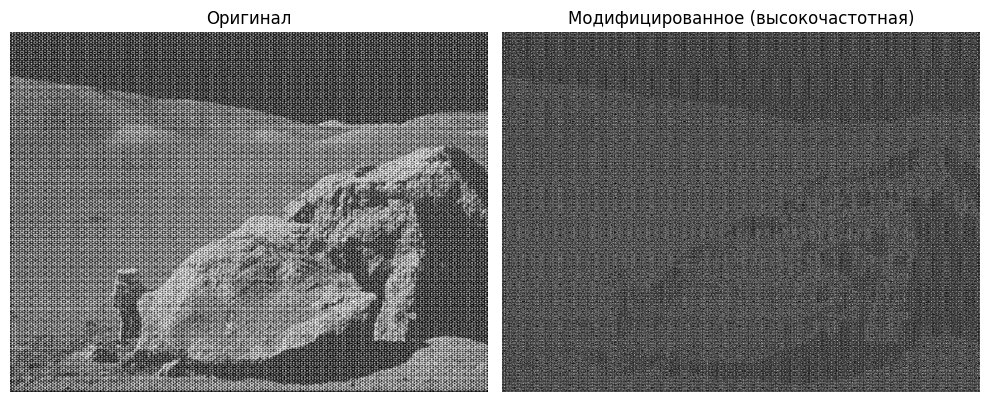

In [15]:
img = cv2.imread('periodic_noise.jpg', cv2.IMREAD_GRAYSCALE)

dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

rows, cols = img.shape
x, y = np.meshgrid(np.arange(cols), np.arange(rows))

sigma = 50 
gaussian_lowpass = np.exp(-((x - cols // 2) ** 2 + (y - rows // 2) ** 2) / (2 * sigma ** 2))
gaussian_highpass = 1 - gaussian_lowpass 

dft_shift *= gaussian_highpass[:, :, np.newaxis]

img_back = cv2.idft(np.fft.ifftshift(dft_shift))
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Оригинал')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_back, cmap='gray')
plt.title('Модифицированное (высокочастотная)')
plt.axis('off')

plt.tight_layout()
plt.show()

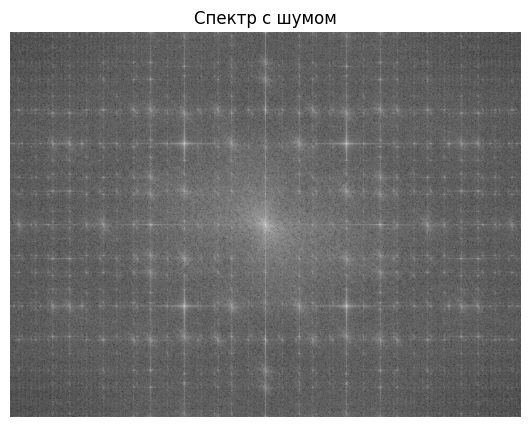

In [16]:
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]) + 1)

plt.figure(figsize=(10, 5))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Спектр с шумом')
plt.axis('off')
plt.show()


In [17]:
def periodic_noise_deletion(img):
    dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))
    local_maxum = peak_local_max(magnitude_spectrum, min_distance=15, threshold_abs=200)

    mask = np.copy(dft_shift)
    mask[:, :, :] = 1

    rows, cols = img.shape
    hrow, hcol = rows // 2, cols // 2
    for i in local_maxum:
        r = np.int32(((i[0] - hrow)**2 + (i[1] - hcol)**2) ** (1 / 2))
        cv2.circle(mask, (hrow, hcol), r, (0, 0))

    dft_shift = dft_shift * mask
    image_idft = cv2.idft(np.fft.ifftshift(dft_shift))
    image_idft = cv2.magnitude(image_idft[:, :, 0], image_idft[:, :, 1])

    return image_idft


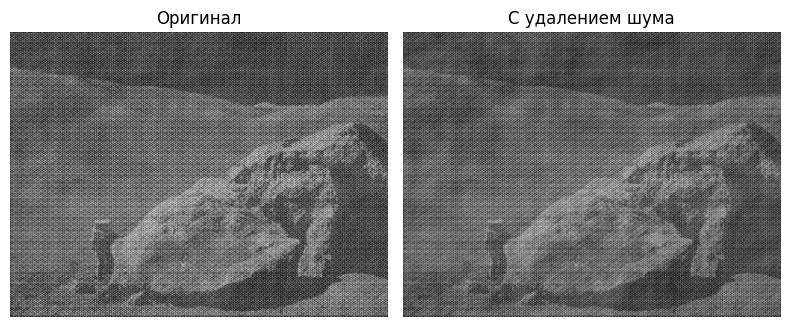

In [19]:
images = {
    "Оригинал": img,
    "С удалением шума": periodic_noise_deletion(img),
}

fig, axs = plt.subplots(1, 2, figsize=(8, 5))

col = 0
for col, (key, img) in enumerate(images.items()):
    axs[col].imshow(img, cmap="gray")
    axs[col].set_title(key)
    axs[col].axis("off")

plt.tight_layout()
plt.show()